## Building Neural networks from scratch


### importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dictionary_to_vector, vector_to_dictionary

### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[-0.1815283 ,  1.67547895,  0.64447845,  0.3805154 , -1.01879338,
         -1.10610083,  1.41722239,  1.30696639, -0.02532214,  1.18605975,
          0.0856159 ,  0.33161038,  0.13187352,  1.7193344 ,  0.29874511,
         -1.12499237, -1.52838789, -0.90598556,  0.42464031, -0.56483139,
         -0.78576858,  0.44256534,  0.17580721,  1.00142723,  0.81330466,
         -0.59268662, -0.59928941,  0.68576021,  0.20347346,  0.80769089,
         -0.64732281,  0.46196079,  0.43243056, -0.38994777,  1.2765968 ,
         -0.88792218,  0.7616636 ,  0.42403867,  2.01818651,  1.78187592,
         -1.78734898, -0.48916102,  0.71765226, -0.10541207, -0.68958315,
          0.05453475,  0.70600868,  0.80304801, -1.70581552, -0.4230439 ],
        [ 0.87048596,  0.31625752, -0.14613015, -1.08334778, -1.55449339,
         -1.25644927,  0.67922217,  0.86263977,  0.02859353,  0.6671453 ,
          0.38579464,  0.07685826, -1.74924162, -0.79072558,  1.10702695,
          0.0326315 ,  2.6551319 , -0

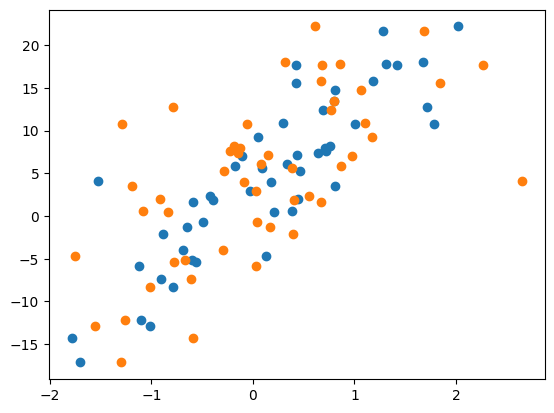

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [27]:
A2, cache = forward_propagation(X, parameters)
A2

array([[ 0.7472289 ,  0.91606232,  0.16059807, -0.81897037, -1.22289976,
        -1.17704507,  1.04263791,  1.0939415 ,  0.01879626,  0.99657882,
         0.44934812,  0.2490586 , -1.13725238, -0.02052998,  1.01185989,
        -0.48833201,  1.10338266, -0.90856951,  1.26246571, -0.91532751,
        -1.06664234, -0.68579125, -0.00445932,  0.41514328, -0.73761011,
         0.41530267, -0.86285907,  0.94270099, -0.71318843,  1.08896009,
        -0.13492851, -0.07543335,  0.3710944 ,  0.23931397,  1.25579036,
        -0.00567337,  0.17067116,  1.21691734,  1.10092255, -0.44659738,
        -1.0637946 , -0.19622457,  0.11135432,  0.8393425 , -0.61908869,
         0.98417899,  0.21051526,  0.98241673, -1.23274606,  0.37675145]])

In [10]:
loss = compute_loss(A2, y)
loss

96.42901678349563

In [11]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-5.34889152, -1.10771656],
        [-1.02897286, -0.43187187],
        [-2.54711522, -1.72394157],
        [-1.70213965, -0.67259851]]),
 'db1': array([[-4.21764446],
        [-1.04408243],
        [-1.55952538],
        [-1.07540491]]),
 'dW2': array([[ -9.87719803, -11.43694694,  -3.95852818,  -7.21609972]]),
 'db2': array([[-9.06796696]])}

In [12]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

Numerically approximated gradient of the parameter W[0][0] is:-5.348893239442987
Gradient of W[0][0] calculated by backprop: -5.348891524973787
-1.7144691994985806e-06


In [29]:

def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    
    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    grad_vector = dictionary_to_vector(grads)
    gradapprox = np.zeros(grad_vector.shape)
    print(param_vector)

    for i in range(param_vector.shape[1]):
        theta_minus = np.copy(param_vector)
        theta_minus[0][i] -= eps
        theta_plus = np.copy(param_vector)
        theta_plus[0][i] += eps
        print(theta_minus[0][i], theta_plus[0][i])
        ## convert theta_minus and theta_plus vector to dictionary
        theta_minus = vector_to_dictionary(vector=theta_minus[0], parameters=parameters)
        theta_plus = vector_to_dictionary(vector=theta_plus[0], parameters=parameters)
        ## TODO: forward pass and calculate loss
        pred_minus = forward_propagation(X=X, parameters=theta_minus)
        loss_minus = compute_loss(A2=pred_minus[0], Y=y)
        pred_plus = forward_propagation(X=X, parameters=theta_plus)
        loss_plus = compute_loss(A2=pred_plus[0], Y=y)
        ## TODO: calculate gradient manually
        print(loss_minus, loss_plus)
        gradapprox[0][i] = (loss_plus - loss_minus)/(2 * eps)
        
    ## TODO: check difference between manualy calculated gradient and gradients calculated using backpropagation
    numerator = np.linalg.norm(grad_vector - gradapprox)
    denominator = np.linalg.norm(grad_vector) + np.linalg.norm(gradapprox)
    difference = numerator/denominator
    # print(gradapprox, grad_vector)
    print(difference)
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    

check_grads(parameters = parameters, grads=grads)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
  0.83244264 0.21233911 0.18182497 0.18340451 0.30424224]]
0.3745401088473625 0.3745401288473625
87.58507121628489 87.58507098472526
0.9507142964099161 0.9507143164099162
87.58507121306182 87.58507098794831
0.731993931811405 0.7319939518114051
87.58507118216512 87.58507101884501
0.5986584741970365 0.5986584941970367
87.58507118507823 87.58507101593193
0.15601863044243652 0.1560186504424365
87.58507119841805 87.58507100259209
0.15599451033620265 0.15599453033620264
87.58507116506402 87.58507103594613
0.05808360216819946 0.05808362216819946
87.58507115353257 87.58507104747758
0.8661761357749351 0.8661761557749352
87.5850711209353 87.58507108007485
0.6011150017432088 0.6011150217432089
87.58507110050506 87.58507110050506
0.7080725677960454 0.7080725877960455
87.58507110050506 87.58507110050506
0.020584484295802445 0.02058450429580245
87.58507110050506 87.

In [ ]:
parameters

In [ ]:
loss, check_loss